In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
import joblib


# Data Loading

In [14]:
df = pd.read_csv("DataSet/hand_landmarks_data.csv")

# Data Exploration ans Visualization

In [3]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [4]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [6]:
df.isnull().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

In [7]:
df["label"].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

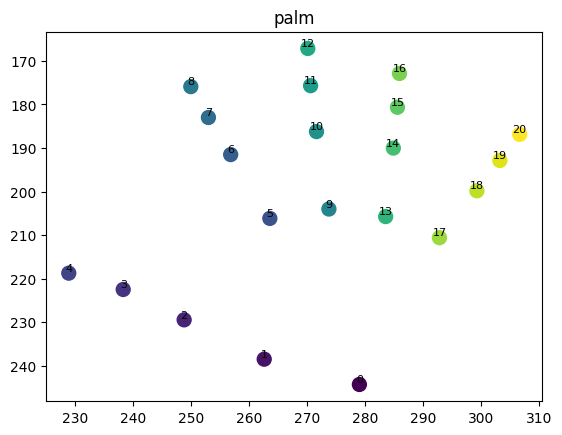

In [8]:
x_cols = [col for col in df.columns if col.startswith('x')]
y_cols = [col for col in df.columns if col.startswith('y')]
x_data = df[x_cols]
y_data = df[y_cols]
point_numbers = range(0, 21)
sample_idx = 11480
plt.gca().invert_yaxis()
scatter = plt.scatter(x_data.iloc[sample_idx], y_data.iloc[sample_idx], c=point_numbers, s=100)
plt.title(df.values[sample_idx,-1])
for i in point_numbers:
    plt.text(x_data.iloc[sample_idx, i],
             y_data.iloc[sample_idx, i],
             str(i),
             ha='center',
             va='bottom',
             fontsize=8)

# Data Preprocessing

In [4]:
def normalize_dataset(df):
    """
    Normalizes X,Y coordinates for all samples in the dataset:
    - Centers wrist (landmark 0) at (0, 0).
    - Scales by middle finger tip (landmark 12) distance.
    - Preserves Z coordinates if they exist.

    Args:
        df: DataFrame with columns like x1,y1,z1,...,x21,y21,z21.

    Returns:
        DataFrame with normalized X,Y and original Z.
    """

    x_col = [col for col in df.columns if col.startswith('x')]
    y_col = [col for col in df.columns if col.startswith('y')]
    z_col = [col for col in df.columns if col.startswith('z')]
    x_data = np.array(df[x_col])
    y_data = np.array(df[y_col])
    z_data = np.array(df[z_col])
    x_wirst = x_data[:,0].reshape(-1,1)
    y_wirst = y_data[:,0].reshape(-1,1)
    x_centered = x_data-x_wirst
    y_centered = y_data - y_wirst

    dis = np.sqrt(x_centered[:,12]**2+y_centered[:,12]**2).reshape(-1,1)
    x_norm = x_centered / dis
    y_norm = y_centered /dis

    normalized_data = {}
    for i in range(21):
        normalized_data[f"x{i+1}"] = x_norm[:, i]
        normalized_data[f"y{i+1}"] = y_norm[:, i]
        normalized_data[f"z{i+1}"] = z_data[:, i]

    normalized = pd.DataFrame(normalized_data)
    return normalized





In [5]:
normalized = normalize_dataset(df)
normalized.head()


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-0.013198,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,-0.029042,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,-0.041256,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,-0.021804,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,-0.021623,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486


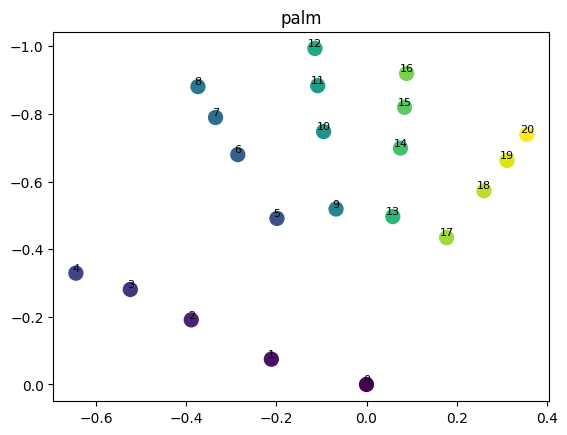

In [11]:
x_cols = [col for col in normalized.columns if col.startswith('x')]
y_cols = [col for col in normalized.columns if col.startswith('y')]
x_data = normalized[x_cols]
y_data = normalized[y_cols]
point_numbers = range(0, 21)
sample_idx = 11480
plt.gca().invert_yaxis()
scatter = plt.scatter(x_data.iloc[sample_idx], y_data.iloc[sample_idx], c=point_numbers, s=100)
plt.title(df.values[sample_idx,-1])

for i in point_numbers:
    plt.text(x_data.iloc[sample_idx, i],
             y_data.iloc[sample_idx, i],
             str(i),
             ha='center',
             va='bottom',
             fontsize=8)

In [6]:
labels = df["label"]
features = normalized

In [7]:
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=.20,train_size=.8,random_state=100)

# Train Models

In [15]:
lr_model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    multi_class='multinomial',  # For multi-class problems
    random_state=42,
    class_weight='balanced'
)
lr_model.fit(features_train, labels_train)

lr_model_score = lr_model.score(features_test,labels_test)

c:\Users\mosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [16]:
svm_model = SVC(class_weight='balanced')
svm_model.fit(features_train,labels_train)
svm_model_score = svm_model.score(features_test,labels_test)

In [21]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(features_train,labels_train)
dt_model_score = dt_model.score(features_test,labels_test)

In [23]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(features_train,labels_train)
rf_model_score = rf_model.score(features_test,labels_test)

In [17]:
sample_weights = compute_sample_weight(class_weight='balanced', y=labels_train)
gb_model = GradientBoostingClassifier()
gb_model.fit(features_train,labels_train,sample_weight=sample_weights)
gb_model_score = gb_model.score(features_test,labels_test)

In [18]:
sample_weights = compute_sample_weight(class_weight='balanced', y=labels_train)
ab_model = AdaBoostClassifier()
ab_model.fit(features_train, labels_train, sample_weight=sample_weights)
ab_model_score = ab_model.score(features_test,labels_test)

c:\Users\mosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(features_train, labels_train)
knn_model_score = knn_model.score(features_test,labels_test)
knn_model_ypred = knn_model.predict(features_test)

# models test and Comparison

In [24]:
print("Scores of the models")
print("Logistic regression:",lr_model_score )
print("Decision tree:",dt_model_score )
print("SVM:", svm_model_score)
print("Random forest:",rf_model_score )
print("Gradient boosting:", gb_model_score)
print("AdaBoost:", ab_model_score)
print("KNN:", knn_model_score)

Scores of the models
Logistic regression: 0.8496592015579357
Decision tree: 0.9557935735150925
SVM: 0.9226874391431353
Random forest: 0.9746835443037974
Gradient boosting: 0.973904576436222
AdaBoost: 0.2882181110029211
KNN: 0.9772151898734177


In [25]:
print("F1-scores of the models:")
lr_model_predict = lr_model.predict(features_test)
lr_model_f1_score = f1_score(labels_test,lr_model_predict,average='weighted')
print("Logistic regression:", lr_model_f1_score)
dt_model_predict = dt_model.predict(features_test)
dt_model_f1_score = f1_score(labels_test,dt_model_predict,average='weighted')
print("Decision tree:", dt_model_f1_score)
svm_model_predict = svm_model.predict(features_test)
svm_model_f1_score = f1_score(labels_test,svm_model_predict,average='weighted')
print("SVM:",svm_model_f1_score )
rf_model_predict = rf_model.predict(features_test)
rf_model_f1_score = f1_score(labels_test,rf_model_predict,average='weighted')
print("Random forest:", rf_model_f1_score)
gb_model_predict = gb_model.predict(features_test)
gb_model_f1_score = f1_score(labels_test,gb_model_predict,average='weighted')
print("Gradient boosting:", gb_model_f1_score)
ab_model_predict = ab_model.predict(features_test)
ab_model_f1_score = f1_score(labels_test,ab_model_predict,average='weighted')
print("AdaBoost:",ab_model_f1_score )
knn_model_ypred = knn_model.predict(features_test)
knn_model_ypred_f1_score = f1_score(labels_test,knn_model_ypred,average='weighted')
print("knn_model:",knn_model_ypred_f1_score )

F1-scores of the models:
Logistic regression: 0.8488152265838319
Decision tree: 0.9557039286307414
SVM: 0.9224561936786391
Random forest: 0.9746865349544063
Gradient boosting: 0.9739255940049251
AdaBoost: 0.20158046362805304
knn_model: 0.9772414761921867


In [26]:
print("Precision of the models:")

print("Logistic regression:", precision_score(labels_test,lr_model_predict,average="weighted"))

print("Decision tree:",precision_score(labels_test,dt_model_predict,average="weighted") )

print("SVM:",precision_score(labels_test,svm_model_predict,average="weighted") )

print("Random forest:",precision_score(labels_test,rf_model_predict,average="weighted") )

print("Gradient boosting:",precision_score(labels_test,gb_model_predict,average="weighted") )

print("AdaBoost:",precision_score(labels_test,ab_model_predict,average="weighted") )

print("KNN:",precision_score(labels_test,knn_model_ypred,average="weighted") )

Precision of the models:
Logistic regression: 0.8503327071762615
Decision tree: 0.9558320099460352
SVM: 0.9274234516248826
Random forest: 0.974789665691846
Gradient boosting: 0.9740924133926835
AdaBoost: 0.21187732228526915
KNN: 0.9774720864779517


c:\Users\mosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
print("Recall of the models:")

print("Logistic regression:", recall_score(labels_test,lr_model_predict,average="weighted"))

print("Decision tree:",recall_score(labels_test,dt_model_predict,average="weighted") )

print("SVM:",recall_score(labels_test,svm_model_predict,average="weighted") )

print("Random forest:",recall_score(labels_test,rf_model_predict,average="weighted") )

print("Gradient boosting:",recall_score(labels_test,gb_model_predict,average="weighted") )

print("AdaBoost:",recall_score(labels_test,ab_model_predict,average="weighted") )

print("KNN:",recall_score(labels_test,knn_model_ypred,average="weighted") )

Recall of the models:
Logistic regression: 0.8496592015579357
Decision tree: 0.9557935735150925
SVM: 0.9226874391431353
Random forest: 0.9746835443037974
Gradient boosting: 0.973904576436222
AdaBoost: 0.2882181110029211
KNN: 0.9772151898734177


### Model Performance Comparison

| Model               | Accuracy  | F1-Score  | Precision | Recall    |
|---------------------|-----------|-----------|-----------|-----------|
| Logistic Regression | 0.8497    | 0.8488    | 0.8503    | 0.8497    |
| Decision Tree       | 0.9558    | 0.9557    | 0.9558    | 0.9558    |
| SVM                 | 0.9227    | 0.9225    | 0.9274    | 0.9227    |
| Random Forest       | 0.9747    | 0.9747    | 0.9748    | 0.9747    |
| Gradient Boosting   | 0.9739    | 0.9739    | 0.9741    | 0.9739    |
| AdaBoost            | 0.2882    | 0.2016    | 0.2119    | 0.2882    |
| KNN                 | 0.9772    | 0.9772    | 0.9775    | 0.9772    |

# Make Grid Search for some Models

In [30]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }

svm = SVC(class_weight='balanced')
svm_gs = GridSearchCV(estimator=svm,param_grid=svm_parameters)


svm_winner = svm_gs.fit(features_train,labels_train)
svm_winner

svm_winner.score(features_test, labels_test)

0.9872760321994287

In [10]:
#the hyper-parameter values of the svc winner
svm_winner = SVC(C=100 , gamma=0.1 , class_weight = 'balanced')
svm_winner.fit(features_train,labels_train)
svm_winner_model_score = svm_winner.score(features_test,labels_test)

In [11]:
svm_winner_predict = svm_winner.predict(features_test)
svm_winner_f1_score = f1_score(labels_test,svm_winner_predict,average='weighted')
print("svm_winner score:",svm_winner_f1_score )
print("svm_winner f1_score:",svm_winner_f1_score )
print("svm_winner recall_score:",recall_score(labels_test,svm_winner_predict,average="weighted") )
print("svm_winner precision_score:",precision_score(labels_test,svm_winner_predict,average="weighted") )

svm_winner score: 0.9869494247157545
svm_winner f1_score: 0.9869494247157545
svm_winner recall_score: 0.986952288218111
svm_winner precision_score: 0.9870151291975905


In [ ]:
Random_forest_parameters = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [5, 10, 20, None],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples in a leaf node
    'bootstrap': [True, False]
}

Random_forest = RandomForestClassifier(class_weight='balanced')
Random_forest_gs = GridSearchCV(estimator=Random_forest,param_grid=Random_forest_parameters)


Random_forest_winner = Random_forest_gs.fit(features_train,labels_train)
Random_forest_winner

Random_forest_winner.score(features_test,labels_test)

In [20]:
#hyper-parmater of Random_forest_winner 
Random_forest_winner = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       n_estimators=200, random_state=42)
Random_forest_winner.fit(features_train,labels_train)
Random_forest_winner_model_score = Random_forest_winner.score(features_test,labels_test)

In [21]:
Random_forest_winner_predict = Random_forest_winner.predict(features_test)
Random_forest_winner_f1_score = f1_score(labels_test,Random_forest_winner_predict,average='weighted')
print("Random_forest_winner score:",Random_forest_winner_model_score )
print("Random_forest_winner f1_score:",Random_forest_winner_f1_score )
print("Random_forest_winner recall_score:",recall_score(labels_test,Random_forest_winner_predict,average="weighted") )
print("Random_forest_winner precision_score:",precision_score(labels_test,Random_forest_winner_predict,average="weighted") )

Random_forest_winner score: 0.9774099318403116
Random_forest_winner f1_score: 0.9774254457357724
Random_forest_winner recall_score: 0.9774099318403116
Random_forest_winner precision_score: 0.9774955497875167


In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],      # Number of neighbors to consider
    'weights': ['uniform', 'distance'],     # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'p': [1, 2]                            # Power parameter for Minkowski metric
}
knn = KNeighborsClassifier()

# Setup GridSearchCV
Knn_winner = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
)

# Run grid search
Knn_winner.fit(features_train,labels_train)


In [16]:
#the hyper-parameter values of the KNN winner
Knn_winner = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, p= 1, weights= 'uniform')
Knn_winner.fit(features_train,labels_train)
Knn_winner_model_score = Knn_winner.score(features_test,labels_test)

In [17]:
Knn_winner_winner_predict = Knn_winner.predict(features_test)
Knn_winner_winner_f1_score = f1_score(labels_test,Knn_winner_winner_predict,average='weighted')
print("knn_winner score:",Knn_winner_model_score )
print("knn_winner f1_score:",Knn_winner_winner_f1_score )
print("knn_winner recall_score:",recall_score(labels_test,Knn_winner_winner_predict,average="weighted") )
print("knn_winner precision_score:",precision_score(labels_test,Knn_winner_winner_predict,average="weighted") )

knn_winner score: 0.9789678675754625
knn_winner f1_score: 0.9789807656586312
knn_winner recall_score: 0.9789678675754625
knn_winner precision_score: 0.9792503712146893


In [19]:
joblib.dump(Knn_winner, 'Models/Knn_winner.pkl')

['Models/Knn_winner.pkl']

### Model Performance Comparison

| Model               | Accuracy  | F1-Score  | Recall    | Precision |
|---------------------|-----------|-----------|-----------|-----------|
| **SVM Winner**      | 0.9869    | 0.9869    | 0.9870    | 0.9870    |
| **Random Forest**   | 0.9774    | 0.9774    | 0.9774    | 0.9775    |
| **KNN Winner**      | 0.9790    | 0.9790    | 0.9790    | 0.9793    |

# save the best model

In [10]:
#best model is svm_winner

joblib.dump(svm_winner, 'svm_winner.pkl')

['svm_winner.pkl']

# Run the model with open_cv and mediapipe

In [25]:
import cv2
import mediapipe as mp
import numpy as np
import joblib  # For loading the SVM model

# Load trained SVM model
svm_model = joblib.load("Models/svm_winner.pkl")

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Start video capture
cap = cv2.VideoCapture()
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(rgb_frame)

    if result.multi_hand_landmarks:
        
        for hand_landmarks in result.multi_hand_landmarks:
            # Extract (x, y, z) coordinates
            landmarks = np.array([(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark])

            # Normalize: Recenter based on wrist position (landmark 0)
            wrist_x, wrist_y, wrist_z = landmarks[0]
            landmarks[:, 0] -= wrist_x  # Center x-coordinates
            landmarks[:, 1] -= wrist_y  # Center y-coordinates
            # DO NOT modify the z-coordinates

            # Scale only x and y using the mid-finger tip (landmark 12)
            mid_finger_x, mid_finger_y, _ = landmarks[12]  # Ignore z for scaling
            scale_factor = np.sqrt(mid_finger_x**2 + mid_finger_y**2)
            landmarks[:, 0] /= scale_factor  # Scale x
            landmarks[:, 1] /= scale_factor  # Scale y
            # DO NOT scale z-coordinates

            # Flatten the features for SVM
            features = landmarks.flatten().reshape(1, -1)
            if not np.isnan(features).any():
            
                # Predict using SVM
                prediction = svm_model.predict(features)[0]

                # Draw landmarks on the frame
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                # Display the prediction on the frame
                cv2.putText(frame, f'Prediction: {prediction}', (50, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow("Hand Gesture Recognition", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

c:\Users\mosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\mosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\mosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\mosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\mosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Us

### **Conclusion: Model Performance Analysis**

Based on the evaluation metrics (Accuracy, F1-Score, Recall, and Precision), we draw the following conclusions:

---

#### **1. Best Performing Model**  
✅ **SVM (Support Vector Machine)**  
   - **Highest scores** across all metrics (~98.7%)  
   - **Balanced performance**: Precision (0.9870) ≈ Recall (0.9870)  
   - **Recommended for**:  
     - Applications requiring **maximum accuracy** (e.g., medical diagnosis, fraud detection)  
     - Tasks where **FP/FN costs are equally critical**  

---

#### **2. Competitive Alternatives**  
🔹 **KNN (K-Nearest Neighbors)**  
   - **Slightly better** than Random Forest (Accuracy: 97.9% vs. 97.7%)  
   - **Strengths**:  
     - Simple implementation  
     - No training time (lazy learning)  
   - **Best for**: Real-time systems with **low-latency requirements**  

🔹 **Random Forest**  
   - **Marginally lower** than KNN but more interpretable  
   - **Advantages**:  
     - Feature importance analysis  
     - Handles nonlinear data well  
   - **Best for**:  
     - Tasks needing **model explainability**  
     - Datasets with **mixed feature types**  

---

#### **3. Key Takeaways**  
| Model          | Strength                  | Weakness                  | Ideal Use Case               |  
|----------------|---------------------------|---------------------------|------------------------------|  
| **SVM**        | Highest accuracy          | Computationally expensive | High-stakes classification   |  
| **KNN**        | Fast prediction           | Sensitive to noise        | Real-time applications       |  
| **Random Forest**| Robust, interpretable    | Slightly lower accuracy   | Feature analysis needed      |  

---


#### **4. Final Decision Guide**  
| Scenario                  | Recommended Model |  
|---------------------------|-------------------|  
| **Prioritize accuracy**   | SVM               |  
| **Need explainability**   | Random Forest     |  
| **Low-latency required**  | KNN               |  

